# https://www.kaggle.com/datasets/priyamchoksi/bitcoin-historical-prices-and-activity-2010-2024

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

import datetime as dt
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest

1. Load the Dataset: Read the dataset using pandas.

In [89]:
df_path = Path('../../DATASETS/bitcoin_2010-07-17_2024-06-28.csv')
df = pd.read_csv(df_path)

2. Basic Statistics: Calculate basic statistics (mean, median, std) for each column.

In [90]:
df_float = df.select_dtypes(include=['float'])
float_numbers = df_float.mean()
median_number = df_float.median()
std_number = df_float.std()

3. Data Cleaning: Check for and handle any missing values.

In [91]:
df.isnull().sum().sum()

0

4. Data Types: Convert date columns to datetime type.

In [92]:
df['Start'] = pd.to_datetime(df['Start']).dt.date
df['End'] = pd.to_datetime(df['End']).dt.date

5. Feature Selection: Select the columns you want to use for analysis.

In [93]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

6. Data Splitting: Split the data into training and testing sets.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

7. Normalization: Normalize the features using MinMaxScaler.

In [95]:
min_max_scaler = MinMaxScaler()
data_normalization = min_max_scaler.fit_transform(df_float)

8. Standardization: Standardize the features using StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
scaler.fit(X_train)

StandardScaler()

In [98]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

9. Linear Regression: Fit a linear regression model to predict the closing price.

In [99]:
regression_model = LinearRegression()

In [100]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = regression_model.predict(X_test)
y_pred

array([51210.12721094,   349.60083464, 44278.97764062, ...,
         241.84979886,   357.27661902, 39396.02588743])

10. Model Evaluation: Evaluate the linear regression model using Mean Squared Error (MSE).

In [102]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

120.04104931072072

In [103]:
MSE = mean_squared_error(y_test, y_pred)
MSE

81419.23172916533

In [104]:
RMSE = np.sqrt(MSE)
RMSE

285.3405539511784

11. Plotting: Plot the predicted vs actual closing prices.

Text(0.5, 1.0, 'Actual vs Predicted Closing Price')

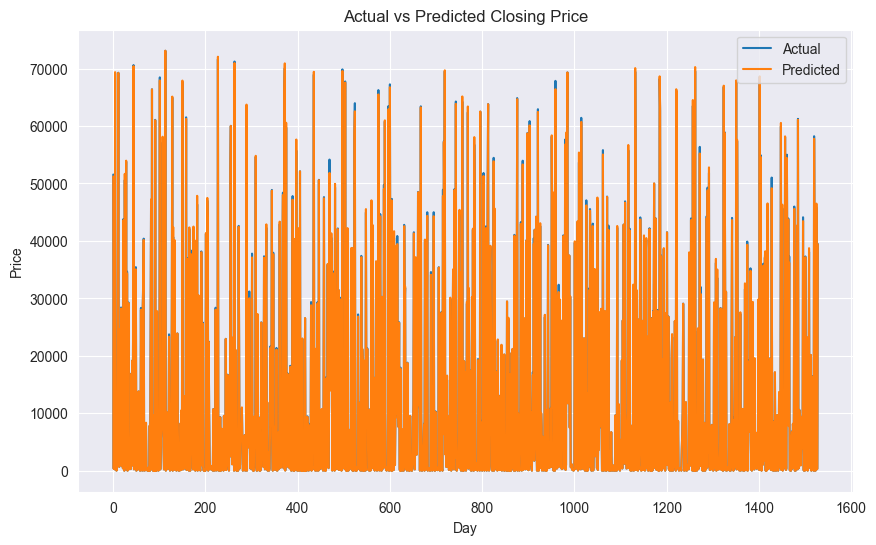

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Actual vs Predicted Closing Price')


12. Train/Test Split: Use different train/test splits and evaluate the performance.

In [106]:
def evaluate_model(split_ratio, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=None)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    return MAE, MSE, RMSE



In [107]:
splits = [0.3, 0.2, 0.1]

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=None)  # Ensure random_state
    # is varied or not set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(f"Split {1-split}:{split} - MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Split 0.7:0.3 - MAE: 114.4288770910029, MSE: 83633.4067390139, RMSE: 289.1944099373532
Split 0.8:0.2 - MAE: 118.61593331792017, MSE: 76259.76695691531, RMSE: 276.1517100380067
Split 0.9:0.1 - MAE: 138.30925598446606, MSE: 111653.84941763822, RMSE: 334.14644905735304


13. Cross-Validation: Perform cross-validation on the linear regression model.

In [108]:
model = LinearRegression()

In [109]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

In [110]:
mean_score = np.mean(scores)
mean_score

-82314.99309434253

In [111]:
std_deviation_score = np.std(scores)
std_deviation_score

93226.06694704332

14. Polynomial Features: Create polynomial features and fit a polynomial regression model.

In [112]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[1.00000000e+00, 6.08829000e+04, 6.23384300e+04, ...,
        1.47838205e+22, 1.46926838e+23, 1.46021090e+24],
       [1.00000000e+00, 6.17339900e+04, 6.23575800e+04, ...,
        1.03546165e+22, 1.23182125e+23, 1.46541748e+24],
       [1.00000000e+00, 6.03179900e+04, 6.22311600e+04, ...,
        1.10315630e+22, 1.26921309e+23, 1.46026621e+24],
       ...,
       [1.00000000e+00, 8.08000000e-02, 8.08000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.58000000e-02, 8.58000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00000000e-02, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [113]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [114]:
scaler = StandardScaler()

In [115]:
X_train_poly_scaler = scaler.fit_transform(X_train_poly)
X_train_poly_scaler

array([[ 0.        ,  0.84361654,  0.81894074, ..., -0.10886703,
         0.09097022,  0.27772749],
       [ 0.        ,  1.59210839,  1.54302053, ...,  0.78641133,
         1.03328793,  0.91380408],
       [ 0.        , -0.09578795, -0.09910945, ..., -0.4053673 ,
        -0.42998492, -0.37122368],
       ...,
       [ 0.        , -0.64561352, -0.64654303, ..., -0.41143105,
        -0.45514636, -0.44802491],
       [ 0.        , -0.63830814, -0.63922335, ..., -0.41143134,
        -0.4551498 , -0.44801349],
       [ 0.        ,  1.66926137,  1.64089723, ...,  0.80386333,
         1.19855243,  1.20889343]])

In [116]:
X_test_poly_scaled = scaler.transform(X_test_poly)
X_test_poly_scaled

array([[ 0.        ,  2.17443891,  2.25480191, ...,  0.83059739,
         1.60251342,  2.06210404],
       [ 0.        , -0.65172804, -0.65227013, ..., -0.41143147,
        -0.45515371, -0.44809138],
       [ 0.        ,  1.89319933,  1.88108923, ...,  1.18398191,
         1.612072  ,  1.52427939],
       ...,
       [ 0.        , -0.65828613, -0.65834863, ..., -0.41143133,
        -0.45515252, -0.44812396],
       [ 0.        , -0.65142143, -0.65168947, ..., -0.41142954,
        -0.45514068, -0.44807575],
       [ 0.        ,  1.56377586,  1.56903451, ..., -0.19979013,
         0.23027509,  1.18649733]])

In [117]:
model = LinearRegression()
model.fit(X_train_poly_scaler, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test_poly_scaled)
y_pred

array([51288.49471348,   350.88026278, 44223.14676093, ...,
         240.92745204,   356.92755997, 39488.48517484])

In [119]:
MAE = mean_absolute_error(y_test, y_pred)
MAE # Liner Regresion 120.04104931072072

120.92524679339122

In [120]:
MSE = mean_squared_error(y_test, y_pred)
MSE # Liner Regresion 81419.23172916533

80845.03744766818

In [121]:
RMSE = np.sqrt(MSE)
RMSE # Liner Regresion 284.33261762884007

284.33261762884007

In [122]:
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

MAE: 120.92524679339122, MSE: 80845.03744766818, RMSE: 284.33261762884007


15. Lasso Regression: Fit a Lasso regression model and evaluate it.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
lasso_cv_pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=[0.1, 1.0, 10.0], cv=5, random_state=42, max_iter=10000)
)

In [125]:
lasso_cv_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=[0.1, 1.0, 10.0], cv=5, max_iter=10000,
                         random_state=42))])

In [126]:
lasso_cv_model = lasso_cv_pipeline.named_steps['lassocv']
print(f"Best alpha: {lasso_cv_model.alpha_}")

Best alpha: 0.1


In [127]:
y_pred_Lasso = lasso_cv_pipeline.predict(X_test)

In [128]:
MEA = mean_absolute_error(y_test, y_pred)
MEA

120.92524679339122

In [129]:
MSE = mean_squared_error(y_test, y_pred)
MSE

80845.03744766818

In [130]:
RMSE = np.sqrt(MSE)
RMSE

284.33261762884007

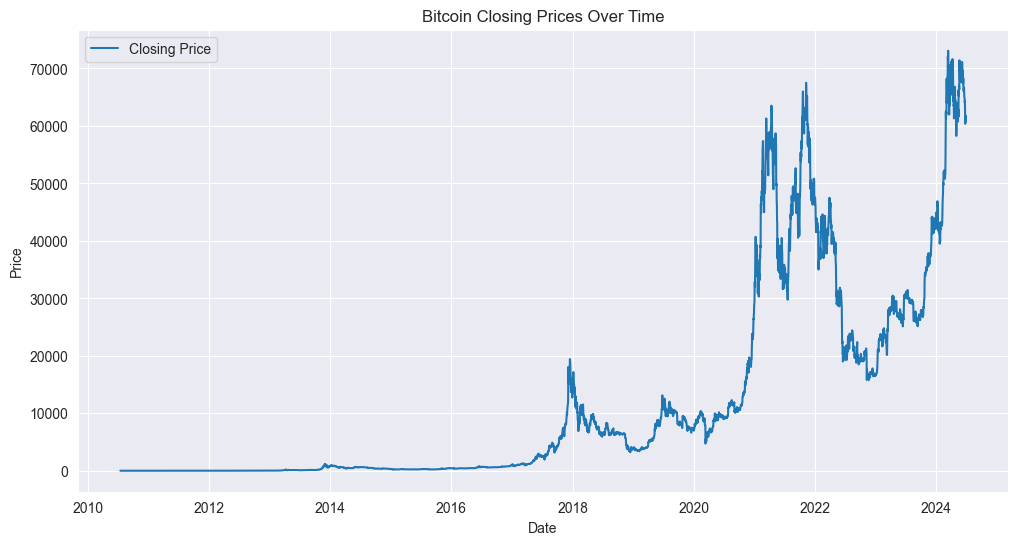

New Lasso Regression - MAE: 123.13644357602506, MSE: 84538.58677788249, RMSE: 290.75520077529563


In [131]:
# EDA: Plotting Bitcoin Closing Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Start'], df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.legend()
plt.show()

# Feature Engineering: Adding a 7-day Rolling Average as a New Feature
df['7_day_rolling_avg'] = df['Close'].rolling(window=7).mean()

# Splitting the data again to include the new feature, assuming 'Start' and 'End' are not included
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap', '7_day_rolling_avg']].dropna()
y = df['Close'][6:]  # Adjusting for the NaN values introduced by rolling average

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting a model, for example, Lasso again with the new feature
lasso_cv_pipeline.fit(X_train_scaled, y_train)

# Predicting and evaluating with the new feature
y_pred_lasso = lasso_cv_pipeline.predict(X_test_scaled)
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)

print(f"New Lasso Regression - MAE: {MAE_lasso}, MSE: {MSE_lasso}, RMSE: {RMSE_lasso}")

In [132]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are already defined

# Step 1: Create polynomial features
degree = 2  # Example degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Step 2: Scale the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Step 3: Split the data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Step 5: Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
MAE_poly = mean_absolute_error(y_test, y_pred_poly)
MSE_poly = mean_squared_error(y_test, y_pred_poly)
RMSE_poly = np.sqrt(MSE_poly)

print(f"Polynomial Regression - MAE: {MAE_poly}, MSE: {MSE_poly}, RMSE: {RMSE_poly}")

Polynomial Regression - MAE: 124.26886198188637, MSE: 93823.22691110353, RMSE: 306.3057735516971


In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are already defined with the 7-day rolling average included

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluating the model
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MSE_linear = mean_squared_error(y_test, y_pred_linear)
RMSE_linear = np.sqrt(MSE_linear)

print(f"Linear Regression with 7-day rolling average - MAE: {MAE_linear}, MSE: {MSE_linear}, RMSE: {RMSE_linear}")

Linear Regression with 7-day rolling average - MAE: 122.8422163621293, MSE: 86529.50986908867, RMSE: 294.1589874015218


16. Ridge Regression: Fit a Ridge regression model and evaluate it.

In [134]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and fitting the Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [135]:
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MAE_ridge

124.13019406835224

In [136]:
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
MSE_ridge

86267.65286003187

In [137]:
RMSE_ridge = np.sqrt(MSE_ridge)
RMSE_ridge

293.7135557988972

In [138]:
print(f"Ridge Regression - MAE: {MAE_ridge}, MSE: {MSE_ridge}, RMSE: {RMSE_ridge}")

Ridge Regression - MAE: 124.13019406835224, MSE: 86267.65286003187, RMSE: 293.7135557988972


17. ElasticNet Regression: Fit an ElasticNet regression model and evaluate it.

In [139]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and fitting the ElasticNet model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

# Predicting
y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)


In [140]:
MAE_elastic_net =  mean_absolute_error(y_test, y_pred_elastic_net)
MAE_elastic_net

295.0560687339993

In [141]:
MSE_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
MSE_elastic_net

280005.814328066

In [142]:
RMSE_elastic_net = np.sqrt(MSE_elastic_net)
RMSE_elastic_net

529.1557562080054

18. Decision Tree: Fit a decision tree regressor and evaluate its performance.

In [143]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

In [144]:
MAE_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
MAE_decision_tree

211.44284704558729

In [145]:
MSE_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
MSE_decision_tree

281041.6893207618

In [146]:
RMSE_decision_tree = np.sqrt(MSE_decision_tree)
RMSE_decision_tree

530.1336523186977

19. Random Forest: Fit a random forest regressor and evaluate its performance.

In [147]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

MAE_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
MSE_random_forest = mean_squared_error(y_test, y_pred_random_forest)
RMSE_random_forest = np.sqrt(MSE_random_forest)

print(f"Random Forest - MAE: {MAE_random_forest}, MSE: {MSE_random_forest}, RMSE: {RMSE_random_forest}")

Random Forest - MAE: 162.51279499755623, MSE: 155117.61245111513, RMSE: 393.8497333388905


20. Feature Importance: Determine feature importance using the random forest model.

Random Forest - MAE: 162.51279499755623, MSE: 155117.61245111513, RMSE: 393.8497333388905


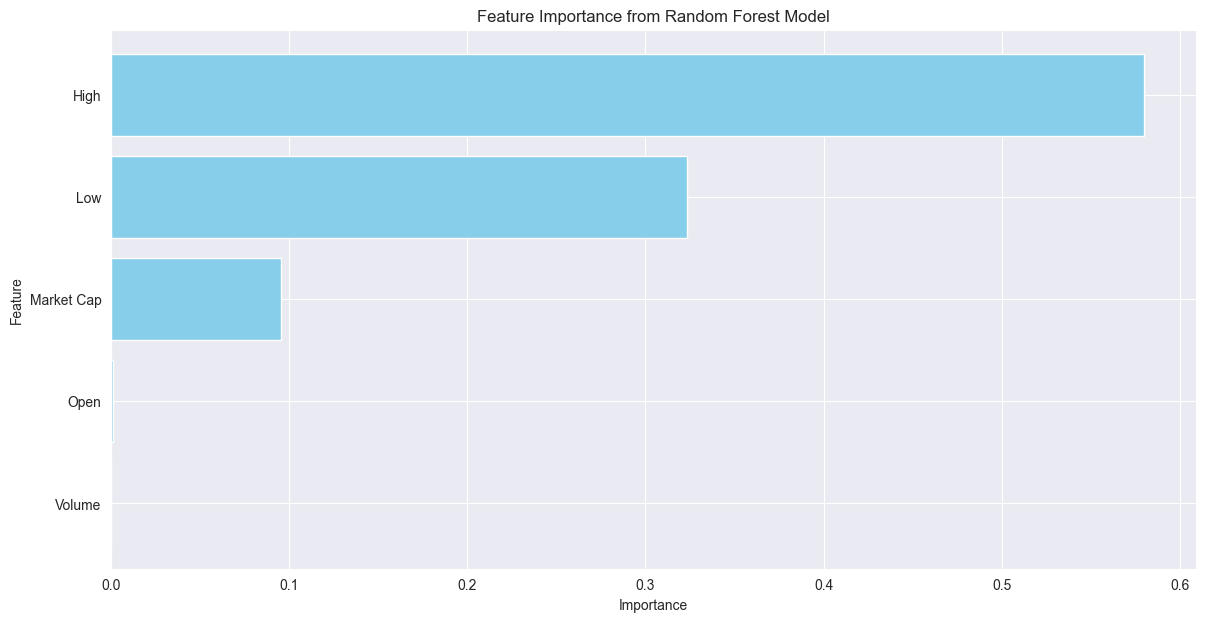

In [148]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

MAE_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
MSE_random_forest = mean_squared_error(y_test, y_pred_random_forest)
RMSE_random_forest = np.sqrt(MSE_random_forest)

print(f"Random Forest - MAE: {MAE_random_forest}, MSE: {MSE_random_forest}, RMSE: {RMSE_random_forest}")

# Feature importance
feature_importance = random_forest_model.feature_importances_
features = X.columns

# Create dataframe for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# sort dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(14, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()

21. Gradient Boosting: Fit a gradient boosting regressor and evaluate its performance.

In [149]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

gardiant_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gardiant_boosting_model.fit(X_train, y_train)

y_pred_gardiant_boosting = gardiant_boosting_model.predict(X_test)

MAE_gardiant_boosting = mean_absolute_error(y_test, y_pred_gardiant_boosting)
MSE_gardiant_boosting = mean_squared_error(y_test, y_pred_gardiant_boosting)
RMSE_gardiant_boosting = np.sqrt(MSE_gardiant_boosting)

print(f"Gradient Boosting - MAE: {MAE_gardiant_boosting}, MSE: {MSE_gardiant_boosting}, RMSE: {RMSE_gardiant_boosting}")

Gradient Boosting - MAE: 202.8122865941629, MSE: 198488.62338179824, RMSE: 445.5206206022323


22. K-Nearest Neighbors: Fit a KNN regressor and evaluate its performance.

In [150]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

kneighbors_model = KNeighborsRegressor(n_neighbors=5)
kneighbors_model.fit(X_train, y_train)

y_pred = kneighbors_model.predict(X_test)

MAE_kneighbors = mean_absolute_error(y_test, y_pred)
MSE_kneighbors = mean_squared_error(y_test, y_pred)
RMSE_kneighbors = np.sqrt(MSE_kneighbors)

print(f"K-Nearest Neighbors - MAE: {MAE_kneighbors}, MSE: {MSE_kneighbors}, RMSE: {RMSE_kneighbors}")

K-Nearest Neighbors - MAE: 251.64652259473945, MSE: 368727.3813827998, RMSE: 607.2292659142837


23. Support Vector Regression: Fit an SVR model and evaluate its performance.

In [151]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

MAE_svr = mean_absolute_error(y_test, y_pred_svr)
MSE_svr = mean_squared_error(y_test, y_pred_svr)
RMSE_svr = np.sqrt(MSE_svr)

print(f"Support Vector Regression - MAE: {MAE_svr}, MSE: {MSE_svr}, RMSE: {RMSE_svr}")

Support Vector Regression - MAE: 11419.047297855577, MSE: 384427929.8857064, RMSE: 19606.83375473221


24. Principal Component Analysis (PCA): Perform PCA and plot the explained variance.

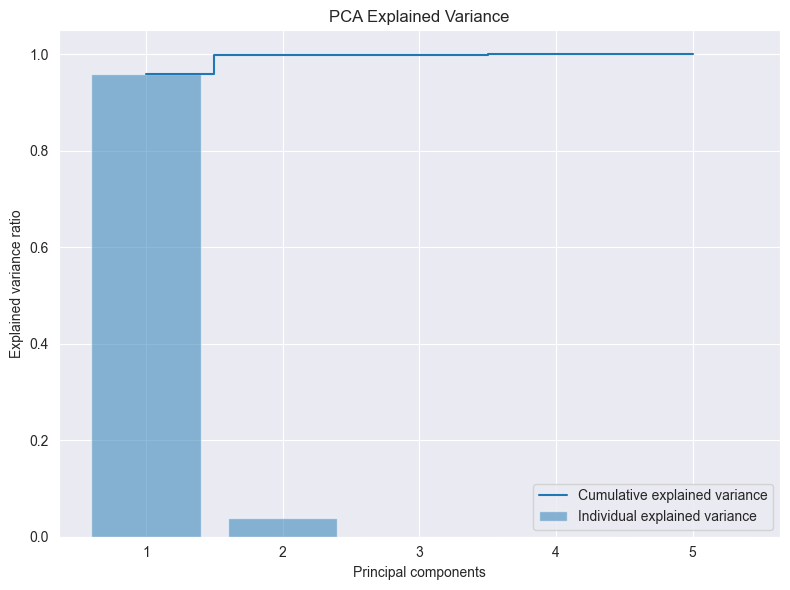

In [152]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)


explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

25. Clustering: Perform K-means clustering on the dataset.

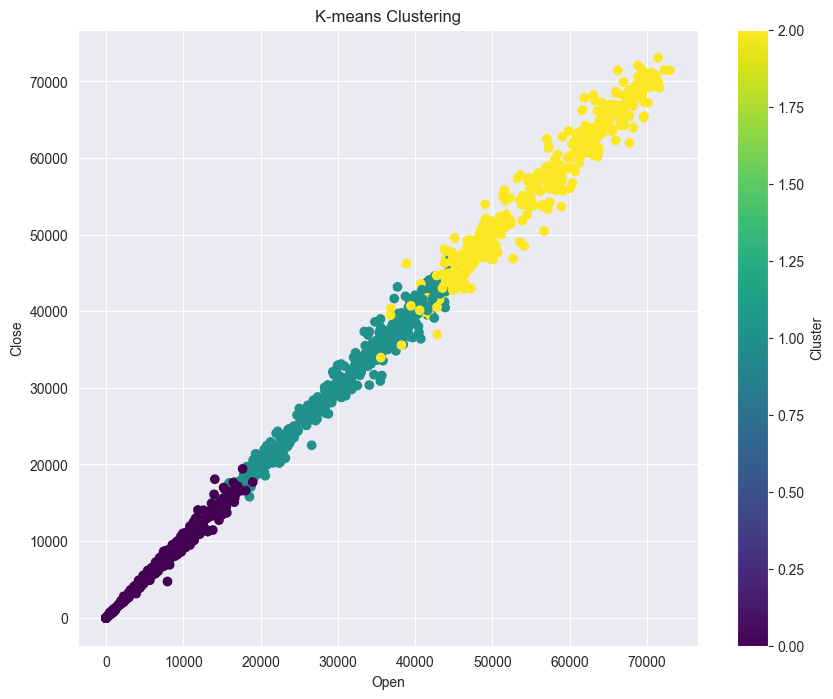

In [153]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
plt.scatter(df['Open'], df['Close'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering')
plt.xlabel('Open')
plt.ylabel('Close')
plt.colorbar(label='Cluster')
plt.show()

26. Elbow Method: Use the elbow method to find the optimal number of clusters.

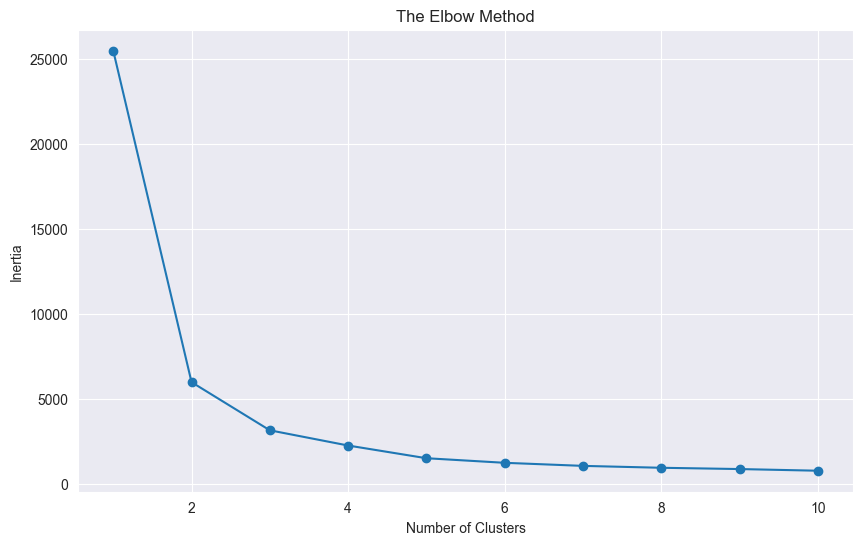

In [154]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

interia = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    interia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(K, interia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

27. Hierarchical Clustering: Perform hierarchical clustering and plot the dendrogram.

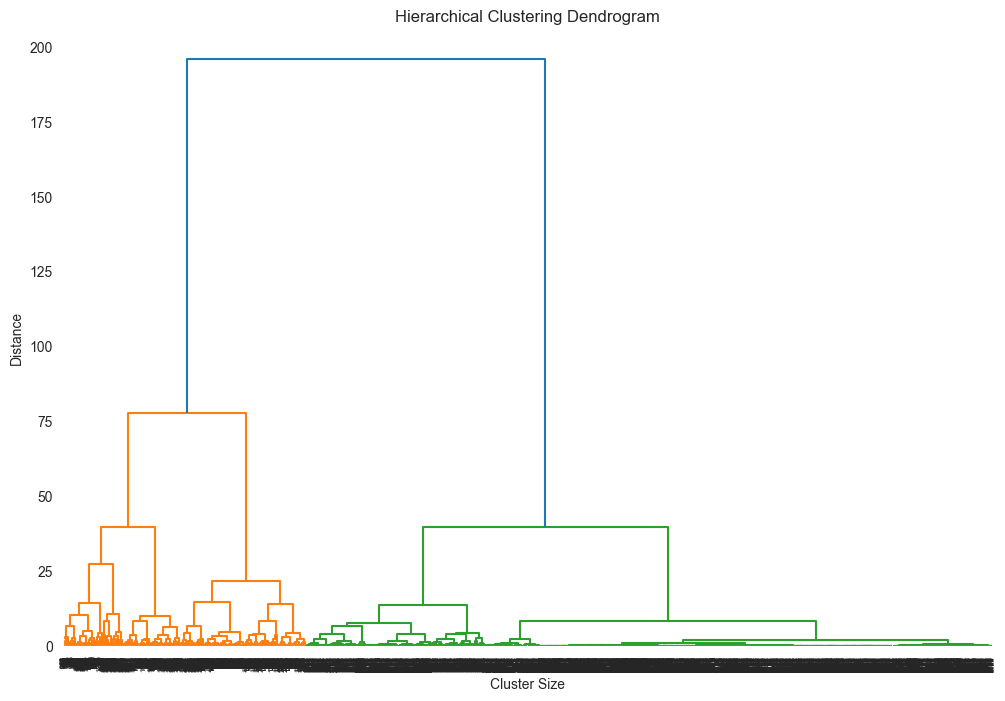

In [155]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

28. DBSCAN: Perform DBSCAN clustering and evaluate the results.

Estimated number of clusters: 1
Estimated number of noise points: 15


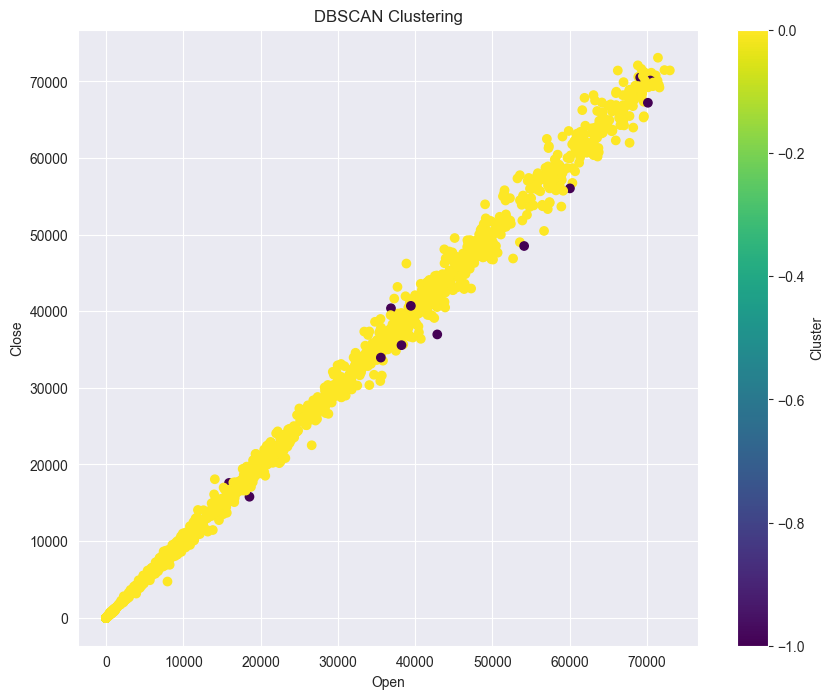

In [156]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

df['Cluster'] = dbscan.labels_
n_cluster = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f'Estimated number of clusters: {n_cluster}')
print(f'Estimated number of noise points: {n_noise}')

plt.figure(figsize=(10, 8))
plt.scatter(df['Open'], df['Close'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Open')
plt.ylabel('Close')
plt.colorbar(label='Cluster')
plt.show()

29. Outlier Detection: Detect outliers using Isolation Forest.

Number of outliers: 510


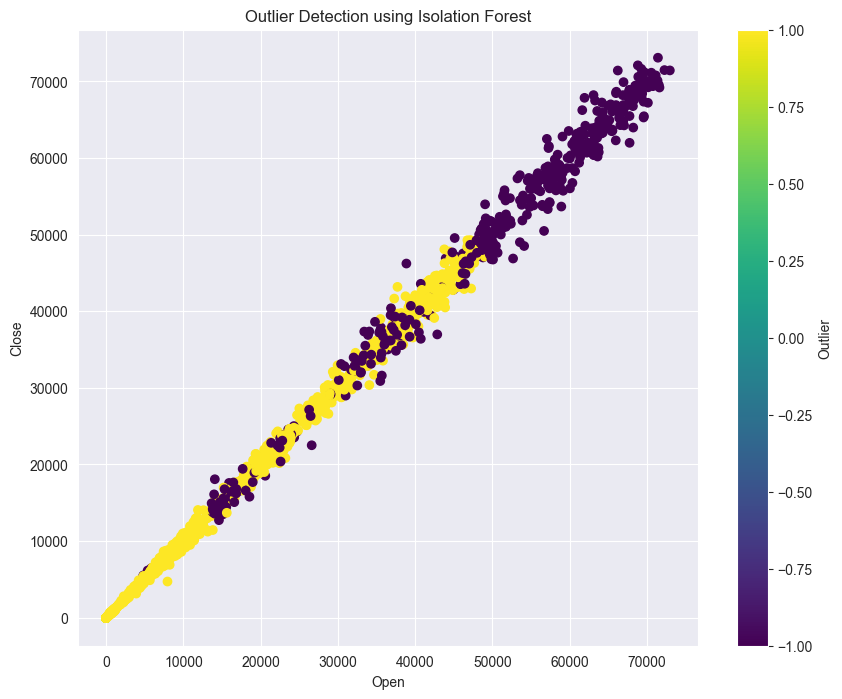

In [157]:
X = df[['Open', 'High', 'Low', 'Volume', 'Market Cap']]

scaled = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X_scaled)

df['Outlier'] = outliers

n_outliers = list(outliers).count(-1)
print(f'Number of outliers: {n_outliers}')

plt.figure(figsize=(10, 8))
plt.scatter(df['Open'], df['Close'], c=df['Outlier'], cmap='viridis', marker='o')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Open')
plt.ylabel('Close')
plt.colorbar(label='Outlier')
plt.show()

30. Feature Engineering: Create new features based on existing data.

In [158]:
df['Start'] = pd.to_datetime(df['Start'])

df['Price Range'] = df['High'] - df['Low']
df['Price Average'] = (df['High'] + df['Low']) / 2

df['Rolling_Mean_Close_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Mean_Volume_7'] = df['Volume'].rolling(window=7).mean()

df['Day_of_Week'] = df['Start'].dt.dayofweek
df['Month'] = df['Start'].dt.month
df['Year'] = df['Start'].dt.year

df['Volume_Price_Avg'] = df['Volume'] * df['Price Average']
df

,Start,End,Open,High,Low,Close,Volume,Market Cap,7_day_rolling_avg,Cluster,Outlier,Price Range,Price Average,Rolling_Mean_Close_7,Rolling_Mean_Volume_7,Day_of_Week,Month,Year,Volume_Price_Avg
0,2024-06-27,2024-06-28,60882.9000,62338.4300,60666.1900,61646.0500,1.215887e+11,1.208392e+12,NaN,0,-1,1672.24,61502.3100,NaN,NaN,3,6,2024,7.477988e+15
1,2024-06-26,2024-06-27,61733.9900,62357.5800,60761.2400,60761.2400,1.017576e+11,1.210544e+12,NaN,0,-1,1596.34,61559.4100,NaN,NaN,2,6,2024,6.264140e+15
2,2024-06-25,2024-06-26,60317.9900,62231.1600,60272.5800,61789.9800,1.050312e+11,1.208415e+12,NaN,0,-1,1958.58,61251.8700,NaN,NaN,1,6,2024,6.433360e+15
3,2024-06-24,2024-06-25,63168.0300,63316.0100,58946.2400,60382.8100,8.828355e+10,1.211101e+12,NaN,0,-1,4369.77,61131.1250,NaN,NaN,0,6,2024,5.396873e+15
4,2024-06-23,2024-06-24,64276.0400,64521.0300,63290.4300,63290.4300,6.853945e+10,1.265327e+12,NaN,0,-1,1230.60,63905.7300,NaN,NaN,6,6,2024,4.380064e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.000000e+00,0.000000e+00,0.059043,0,1,0.00,0.0792,0.059043,0.0,2,7,2010,0.000000e+00
5091,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.000000e+00,0.000000e+00,0.061143,0,1,0.00,0.0747,0.061143,0.0,1,7,2010,0.000000e+00
5092,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.000000e+00,0.000000e+00,0.064686,0,1,0.00,0.0808,0.064686,0.0,0,7,2010,0.000000e+00
5093,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.000000e+00,0.000000e+00,0.069729,0,1,0.00,0.0858,0.069729,0.0,6,7,2010,0.000000e+00


31. Time Series Analysis: Analyze the time series data for trends and seasonality.

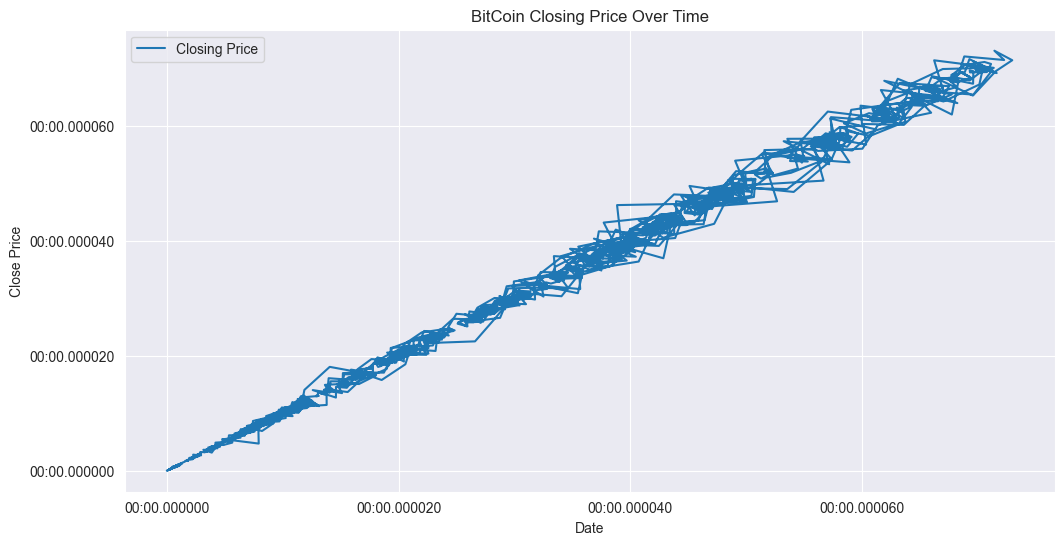

ValueError: could not convert string to float: '2024-06-28'

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_path = Path('../../DATASETS/bitcoin_2010-07-17_2024-06-28.csv')
df = pd.read_csv(df_path)

df['Open'] = pd.to_datetime(df['Open'])
df['Close'] = pd.to_datetime(df['Close'])


df.set_index('Open', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title('BitCoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

decomposition = seasonal_decompose(df['End'], model='additive', period=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,60882.9000,62338.4300,60666.1900,61646.0500,1.215887e+11,1.208392e+12
1,2024-06-26,2024-06-27,61733.9900,62357.5800,60761.2400,60761.2400,1.017576e+11,1.210544e+12
2,2024-06-25,2024-06-26,60317.9900,62231.1600,60272.5800,61789.9800,1.050312e+11,1.208415e+12
3,2024-06-24,2024-06-25,63168.0300,63316.0100,58946.2400,60382.8100,8.828355e+10,1.211101e+12
4,2024-06-23,2024-06-24,64276.0400,64521.0300,63290.4300,63290.4300,6.853945e+10,1.265327e+12
...,...,...,...,...,...,...,...,...
5090,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.000000e+00,0.000000e+00
5091,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.000000e+00,0.000000e+00
5092,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.000000e+00,0.000000e+00
5093,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.000000e+00,0.000000e+00
